In [66]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [62]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#sns.set(style="whitegrid")
#sns.set_palette('coolwarm')
sns.set_palette('Set2')
from sklearn import metrics

In [2]:
dataset = pd.read_csv('diabetes_data_upload.csv')

In [3]:
dataset.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
dataset.shape

(520, 17)

In [5]:
def f_p(x):
    return '{:.1f}%\n({:.0f})'.format(x, total*x/100)

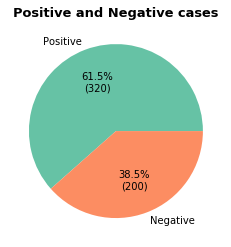

In [32]:
v_counts = dataset['class'].value_counts()
total = len(dataset['class'])
fig = plt.figure()
plt.pie(v_counts, labels=v_counts.index, autopct=f_p);
plt.title('Positive and Negative cases', fontweight="bold", size = 13)
plt.show()

Average Age: 48.03
Average Age for Positive cases: 49.07
Average Age for Negative cases: 46.36


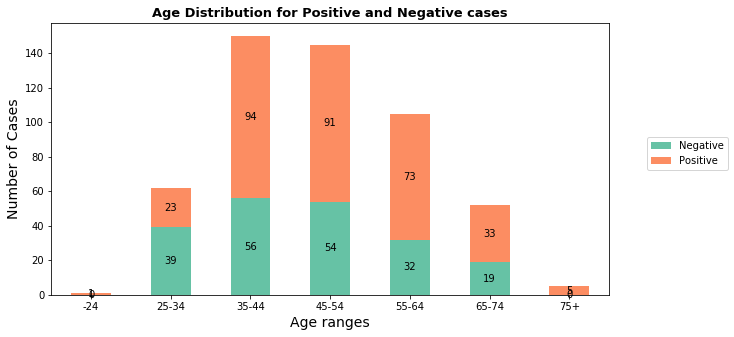

For 35 and older age groups, the share of Positive cases is higher than the share of Negative cases


In [63]:
df_pos=dataset[dataset['class']=='Positive']
df_neg=dataset[dataset['class']=='Negative']
print("Average Age:", round(dataset["Age"].mean(),2))
print("Average Age for Positive cases:", round(df_pos["Age"].mean(),2))
print("Average Age for Negative cases:", round(df_neg["Age"].mean(),2))

#bins = [16, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 90]
#labels = ['-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75+']
bins = [16, 24, 34, 44, 54, 64, 74, 90]
labels = ['-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']
df_copy = dataset.copy()
df_copy['agerange'] = pd.cut(df_copy['Age'], bins, labels = labels,include_lowest = True)
df = df_copy.groupby(["agerange", "class"]).size()
#df = df.to_frame()
#df['Neg_pct'] = round(((df['Negative']/(df['Negative'].sum()))*100),1)
#df['Pos_pct'] = round(((df['Positive']/(df['Positive'].sum()))*100),1)
#a = a[['Neg_pct', 'Pos_pct']]
#df['agerange'] = df.index
#df = df.rename(columns={"0": "count"})
#out_df = pd.merge(dataset, df, how='left', on=['agerange', 'class'])
#out_df = out_df.rename(columns={0: "count"})
#out_df
a = df.unstack()
a['total'] = a['Negative'] + a['Positive']
a['neg_pct'] = round(((a['Negative']/a['total'])*100), 1)
a['pos_pct'] = round(((a['Positive']/a['total'])*100), 1)
a = a[['neg_pct', 'pos_pct']]

g = df.unstack().plot(kind="bar", stacked=True, figsize=(10, 5))
for p in g.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    g.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
g.set_title('Age Distribution for Positive and Negative cases', fontweight="bold", size = 13)
g.set_xlabel("Age ranges", fontsize=14)
plt.xticks(rotation=0)
g.set_ylabel("Number of Cases", fontsize=14)
g.legend(["Negative", "Positive"], bbox_to_anchor=(1.14, 0.6), loc='upper center')
plt.show()

print('For 35 and older age groups, the share of Positive cases is higher than the share of Negative cases')

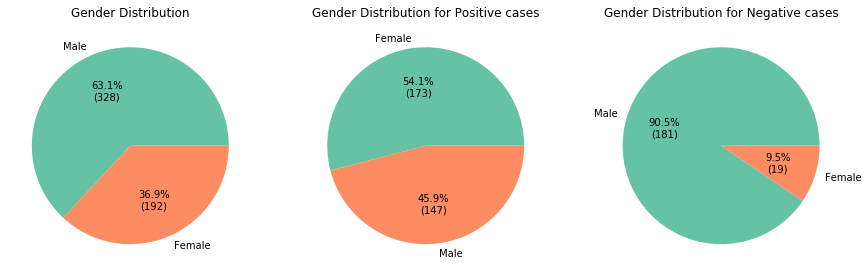

In [65]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,10))

v_counts = dataset['Gender'].value_counts()
total = len(dataset['Gender'])

ax1.pie(v_counts, labels=v_counts.index, autopct=f_p);
ax1.set_title('Gender Distribution', size = 12)


df_pos = dataset[dataset['class']=='Positive']
v_counts = df_pos['Gender'].value_counts()
total = len(df_pos['Gender'])

ax2.pie(v_counts, labels=v_counts.index, autopct=f_p);
ax2.set_title('Gender Distribution for Positive cases', size = 12)


df_neg = dataset[dataset['class']=='Negative']
v_counts = df_neg['Gender'].value_counts()
total = len(df_neg['Gender'])
ax3.pie(v_counts, labels=v_counts.index, autopct=f_p);
ax3.set_title('Gender Distribution for Negative cases', size = 12)

plt.show()

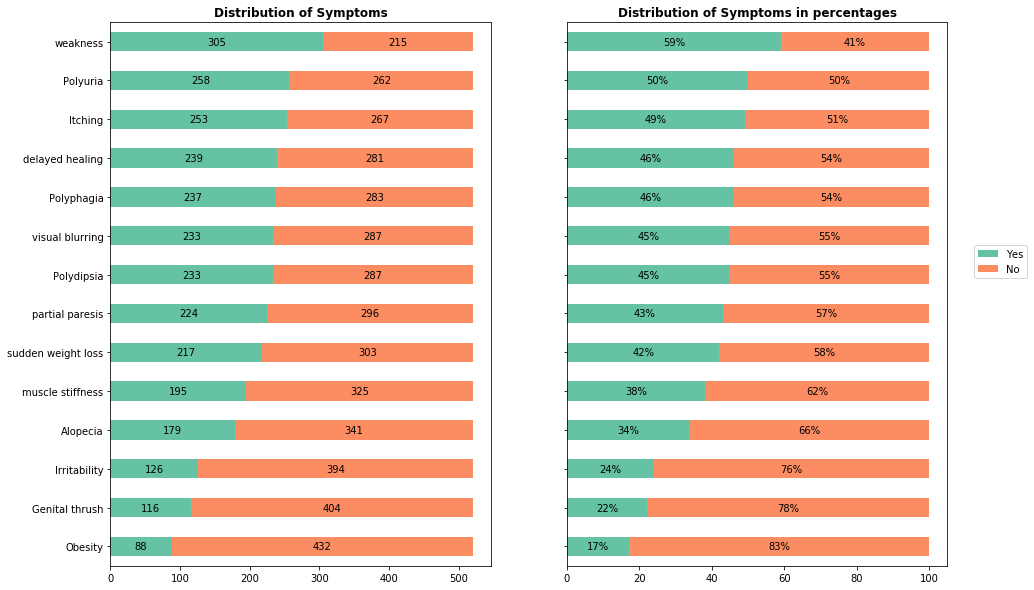

In [28]:
df_symptoms = dataset[dataset.columns.difference(["Age", "class", "Gender"])]

agg_df = pd.DataFrame(columns = ('Symptom', 'Yes', 'No', 'Yes%', 'No%'))

for column in df_symptoms.columns:
    yes_no_dictionary = {}
    yes_no_dictionary[column] = {'Symptom':column, 
                                 'No':df_symptoms[df_symptoms[column] == 'No'].shape[0],
                                 'Yes':df_symptoms[df_symptoms[column] == 'Yes'].shape[0], 
                                 'No%':(round(df_symptoms[df_symptoms[column] == 'No'].shape[0]/df_symptoms.shape[0] * 100)),
                                 'Yes%':(round(df_symptoms[df_symptoms[column] == 'Yes'].shape[0]/df_symptoms.shape[0] * 100))}
    
    agg_df = agg_df.append(yes_no_dictionary[column], ignore_index=True)
agg_df=agg_df.sort_values(by=['Yes'])
agg_df_n = agg_df.drop(columns=['Yes%', 'No%']).set_index('Symptom')
agg_df_p = agg_df.drop(columns=['Yes', 'No']).set_index('Symptom')

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,10))

g = agg_df_n.plot.barh(stacked=True, ax=ax1)
for p in g.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    g.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center')
g.set(ylabel=None)
g.get_legend().remove()
g.set_title('Distribution of Symptoms', fontweight="bold", size = 12)

g = agg_df_p.plot.barh(stacked=True, ax=ax2)
for p in g.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    g.text(x+width/2, 
            y+height/2, 
            '{:.0f}%'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center')
g.set(xlabel=None)
g.set(yticklabels=[])
g.set(ylabel=None)
g.legend(["Yes", "No"], bbox_to_anchor=(1.14, 0.6), loc='upper center')
g.set_title('Distribution of Symptoms in percentages', fontweight="bold", size = 12)
plt.show();

The existence of Polyuria (76%) and Polydipsia (70%) is much higher for Positive cases than for Negative ones (8% and 4% respectively), whereas Weakness is common for both (Positive: 68% and Negative: 44%). Other common symptoms, which are more common for Positive cases, comparing with Negative ones, are partial paresis, Polyghagia, and sudden weight loss.

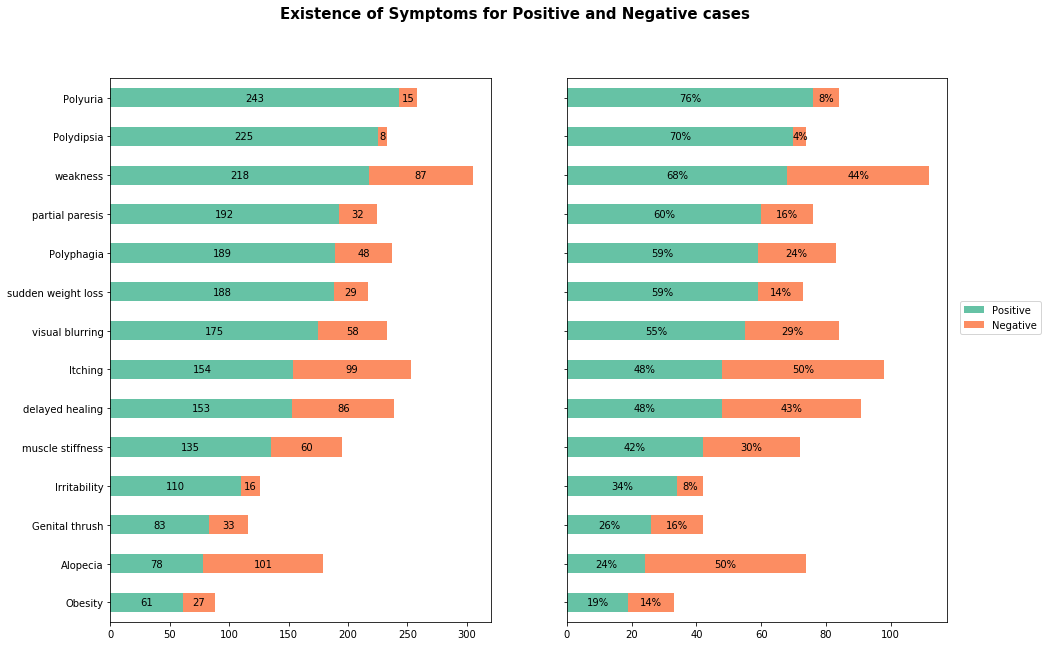

In [61]:
Yes_positive_dataset = pd.DataFrame(columns = ('Col_Name', 'Count', 'Pct'))
No_positive_dataset =  pd.DataFrame(columns = ('Col_Name', 'Count', 'Pct'))
Yes_negative_dataset = pd.DataFrame(columns = ('Col_Name', 'Count', 'Pct'))
No_negative_dataset =  pd.DataFrame(columns = ('Col_Name', 'Count', 'Pct'))

for column in df_pos.columns:
    Yes_positive_dictionary = {}
    No_positive_dictionary = {}
    Yes_positive_dictionary[column] = {'Col_Name':column, 
                                       'Count':df_pos[df_pos[column] == 'Yes'].shape[0], 
                                       'Pct':(round(df_pos[df_pos[column] == 'Yes'].shape[0]/df_pos.shape[0] * 100))}
    No_positive_dictionary[column] = {'Col_Name':column, 
                                       'Count':df_pos[df_pos[column] == 'No'].shape[0], 
                                       'Pct':(round(df_pos[df_pos[column] == 'No'].shape[0]/df_pos.shape[0] * 100))}
    Yes_positive_dataset = Yes_positive_dataset.append(Yes_positive_dictionary[column], ignore_index=True)
    No_positive_dataset = No_positive_dataset.append(No_positive_dictionary[column], ignore_index=True)

Yes_positive_dataset = Yes_positive_dataset.drop([0,1,16])
No_positive_dataset = No_positive_dataset.drop([0,1,16])

for column in df_pos.columns:
    Yes_negative_dictionary = {}
    No_negative_dictionary = {}
    Yes_negative_dictionary[column] = {'Col_Name':column, 
                                       'Count':df_neg[df_neg[column] == 'Yes'].shape[0], 
                                       'Pct':(round(df_neg[df_neg[column] == 'Yes'].shape[0]/df_neg.shape[0] * 100))}
    No_negative_dictionary[column] = {'Col_Name':column, 
                                       'Count':df_neg[df_neg[column] == 'No'].shape[0], 
                                       'Pct':(round(df_neg[df_neg[column] == 'No'].shape[0]/df_neg.shape[0] * 100))}
    Yes_negative_dataset = Yes_negative_dataset.append(Yes_negative_dictionary[column], ignore_index=True)
    No_negative_dataset = No_negative_dataset.append(No_negative_dictionary[column], ignore_index=True)

Yes_negative_dataset = Yes_negative_dataset.drop([0,1,16])
No_negative_dataset = No_negative_dataset.drop([0,1,16])

Yes_positive_dataset = Yes_positive_dataset.sort_values(by = ['Count'], ascending=True)
No_positive_dataset = No_positive_dataset.sort_values(by = ['Count'], ascending=True)
Yes_negative_dataset = Yes_negative_dataset.sort_values(by = ['Count'], ascending=True)
No_negative_dataset = No_negative_dataset.sort_values(by = ['Count'], ascending=True)

df1 = Yes_positive_dataset.rename(columns={"Count": "Count_yes", "Pct": "Pct_yes"}).set_index('Col_Name')
df2 = Yes_negative_dataset.rename(columns={"Count": "Count_no", "Pct": "Pct_no"}).set_index('Col_Name')
df3 = pd.merge(df1, df2, how='inner', on='Col_Name')
df3_count = df3.drop(columns=['Pct_yes', 'Pct_no']).sort_values(by = ['Count_yes'], ascending=True)
df3_pct = df3.drop(columns=['Count_yes', 'Count_no']).sort_values(by = ['Pct_yes'], ascending=True)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,10))
fig.suptitle("Existence of Symptoms for Positive and Negative cases", fontweight="bold", size = 15)

g = df3_count.plot.barh(stacked=True, ax=ax1)
for p in g.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    g.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center')
g.set(ylabel=None)
g.get_legend().remove()
#g.set_title('Existence of Symptoms for Positive and Negative cases', fontweight="bold", size = 15)

g = df3_pct.plot.barh(stacked=True, ax=ax2)
for p in g.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    g.text(x+width/2, 
            y+height/2, 
            '{:.0f}%'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center')
g.set(xlabel=None)
g.set(yticklabels=[])
g.set(ylabel=None)
g.legend(["Positive", "Negative"],bbox_to_anchor=(1.14, 0.6), loc='upper center')
#g.set_title('Existence of Symptoms for Positive and Negative cases in percentages', fontweight="bold", size = 15)
plt.show();

There is a correlation between Polyuria and class, Polydipsia and class (the target variable). Also, Polyuria and Polydipsia correlated with each other.

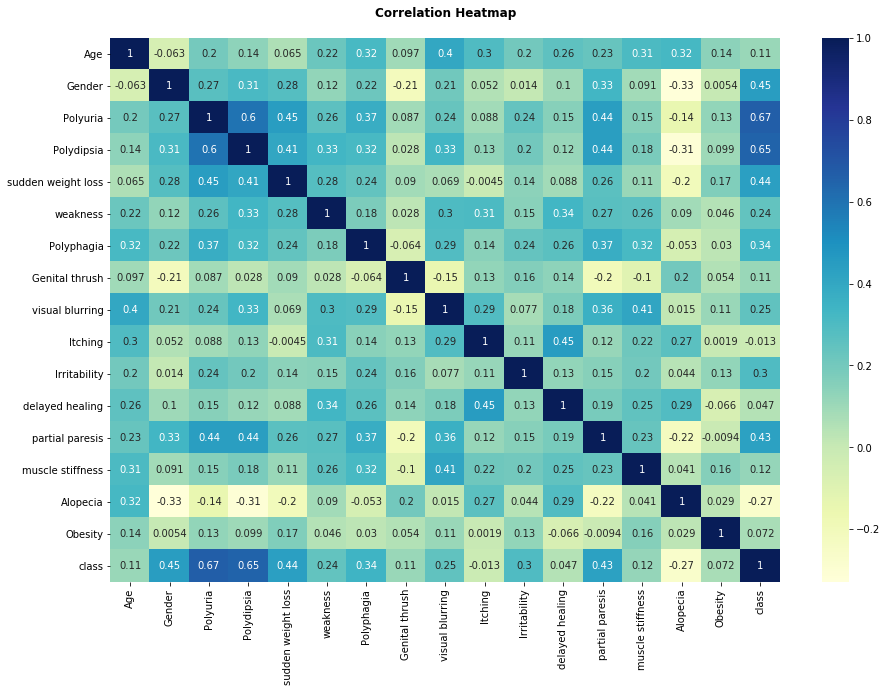

In [60]:
df = dataset.copy()
df['Gender'] = dataset['Gender'].map({'Female':1,'Male':0})
df['class']=dataset['class'].replace({'Positive':1,'Negative':0})
for col in dataset.columns:
    if col not in ["Age","Gender","class"]:
        df[col]=dataset[col].replace({'Yes':1,'No':0})

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.title('Correlation Heatmap\n',fontweight='bold',fontsize=12)
#plt.tight_layout()
#plt.figure(figsize=(3,4))

plt.show()

For more details: https://github.com/sonamanukyan92/supervised-learning-algorithms-on-the-diabetes-dataset